/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Warning: converting a masked element to nan.


The co2 mean is:
335.33790632558026


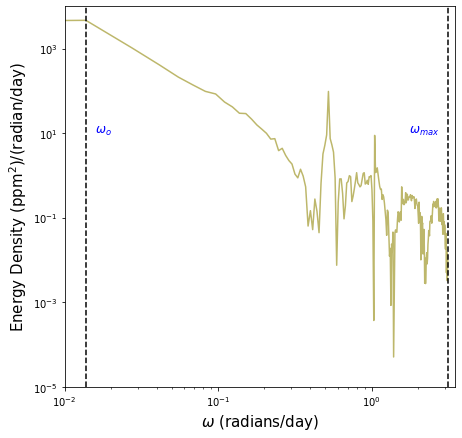

In [1]:
#program to create spectra of MaunaLoa CO2 data
import numpy as np
import matplotlib.pyplot as plt
import random
from netCDF4 import Dataset
#
# read and plot Mauna Loa CO2 data, from a netcdf file
# 
# define the netcdf reading function
def import_data(file_name):
    data_netcdf = Dataset(file_name, mode = 'r')
    data = {}
    for vname in list(data_netcdf.variables):
        data[str(vname)] = data_netcdf.variables[vname][:]
    data_netcdf.close()
    return data
#
path_in = '/Users/MMStoll/Documents/Python/Ocean569/MaunaLoa/MaunaLoa.nc'
ML_data = import_data(path_in)
#
nn=len(ML_data['T'])
mm=int(nn/2+1)
#
# define the data arrays
time_meas=np.zeros(nn)
co2_meas=np.zeros(nn)
cc=np.zeros(nn)
cc_detrend=np.zeros(nn)
freq=np.zeros(mm)
r=np.zeros(nn)
#
#parse the time, CO2 data from the input file
for i in range(0,nn):
    time_meas[i]=(float(ML_data['T'][i])-float(ML_data['T'][0]))
    co2_meas[i]=float(ML_data['co2'][i])
#
## find the value of CO2 mean 
co2mean=np.nanmean(co2_meas) #remove nans from mean!!
print('The co2 mean is:')
print(co2mean)
# 
# remove the CO2 mean from the data
for i in range(0,nn):
  cc[i]=co2_meas[i]-co2mean
# 
# remove NaN values from the dataset  
cc_nonan = cc[~np.isnan(cc)] #remove NaN from dataset!! 
# 
#detrend the CO2 data, remove increase over time 
for i in range(0,nn):
  r[i] = .1066*i+310.66
  cc_detrend[i]=co2_meas[i]-r[i] #remove line from CO2_meas data 
cc_nonan_detrend = cc_detrend[~np.isnan(cc_detrend)]
# determine the frequencies for the spectrum
delt=1
T_length=nn
pi=np.pi
omega0=2.*pi/(T_length*delt)
#
for i in range(0,mm):
     freq[i]=i*omega0
#         
# compute the fft of the input data (temperature in this case)
# the fft will yield a set of complex numbers
# also compute their complex conjugates
# multiply these together to get the spectrum
zz=np.fft.rfft(cc_nonan,n=nn)
fourier_amp_trend=np.sqrt((np.real(zz)**2+np.imag(zz)**2))
fourier_phase=180.*np.arctan2(np.imag(zz),np.real(zz))/pi
spec_cc=np.real(zz*np.conj(zz))/(2.*pi*T_length*delt)
spec_cc_amp=(np.absolute(zz))**2/(2*pi*T_length*delt)
# 
# plot the CO2 level spectrum as a function of frequency
# show the maximum and minimum frequencies
#
fig1=plt.figure(figsize=(7,7))
plt.ylim(10**-5,10**4)
plt.xlim(10**-2,3.5)
plt.loglog(freq,spec_cc,color='darkkhaki')
plt.xlabel('$\omega$ (radians/day)',fontsize=15,ha='center')
plt.ylabel('Energy Density (ppm$^2$)/(radian/day)',fontsize=15)
freq_nyquist=pi/delt
freq_T=2.*pi/(nn*delt)
plt.plot([freq_nyquist,freq_nyquist],[10**-5,6.e5],'--k')
plt.text(1.75,10**1.,'$\omega_{max}$',fontsize=12,color='blue')
plt.plot([freq_T,freq_T],[10**-5,6.e5],'--k',zorder=10)
plt.text(10**-1.8,10**1.,'$\omega_o$',fontsize=12,color='blue')
plt.show()

